# MICROSOFT STUDIO FILM ANALYSIS

## 1. BUSINESS UNDERSTANDING

### INTRODUCTION
Film is a medium that tells stories through images and sounds. It is considered by many to be the most dominant art form of the twentieth century. Films are a means of telling stories through images and sounds, and an instrument of illusion. They can be used to entertain, educate, inform, and inspire.
Film production started a long time ago as a source of entertainment which quicly turned into a way of making money as people are drawn to them. Nowadays one can say that movies are one of the biggest source of entertainment in the world together with music and social media. Many Big companies have ventured into film making as it a source of income if done properly. Apple and Sony are an example of how films can be profitable. 
The metrics of success of a film can be categorized into:
    1. A compelling storyline depending on the genre of the film
    2. A well-written script(Writers)
    3. Great actors who have a reach to the audience
    4. A visionary director alongside a director of photography and editor
    5. Film budget 

The future of films is an interesting topic. According to BBC Culture, an array of rapidly developing technologies offer thrilling potential for the future of motion pictures. Some of these technologies include:

    1. Virtual reality
    2. Augmented reality
    3. Artificial intelligence
    4. 3D printing

However, according to Vox, the future of movies is not bright. The article states that the movie industry is facing a number of challenges, including:

    1. The rise of streaming services like Netflix and Amazon Prime Video
    2. The high cost of producing movies
    3. The decline in movie theater attendance

It will be interesting to see how the movie industry adapts to these challenges in the coming years.



### PROBLEM STATEMENT
Microsoft sees all the big comapanies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


### MAIN OBJECTIVE
To provide recommendations to the Microsoft CEO about the factors that can make a film a success.

#### SPECIFIC OBJECTIVES 
We are going to analyse different factors which can lead us to determine the success of a film:
    1. Determine which genre of films are more likely to be successive 
    2. Determine how actors and directors influence films.
    3. Determine how a film budget can influence the movie to be successful in terms of gross and whether it will be profitable as it is an important aspect of a business as well.


### DATA AVAILABLE 
We have been provided with data from different sources:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

All the data is related we just have to figure out how to use it by finding a relation between them. The data is in csv format we will use the appropriate method to extract them.

## 2. IMPORTING ALL NEEDED LIBRARIES

In [1]:
#import all libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#List all files in my directory
!ls

MICROSOFT STUDIO FILM ANALYSIS.ipynb
README.md
cinema.jpeg
learn-co-curriculum dsc-phase-1-project master zippedData


## 3. READING DATA 

In [3]:
#Importing data from bom.movie_gross.csv.gz
movie_gross = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#Importing data from imdb.name.basics.csv.gz
name_basics = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.name.basics.csv.gz')
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
#Importing from imdb.title.akas.csv.gz
title_akas = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.akas.csv.gz')
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
#Importing  from imdb.title.basics.csv.gz
title_basics  = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
#Importing from imdb.title.crew.csv.gz
title_crew = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.crew.csv.gz')
title_crew.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
#Importing from imdb.title.principals.csv.gz
title_principals = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.principals.csv.gz')
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
#Importing from imdb.title.ratings.csv.gz
title_ratings  = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
#Importing from rt.movie_info.tsv.gz
movie_info = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/rt.movie_info.tsv.gz', delimiter="\t", index_col=0)
movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
#Importing from rt.reviews.tsv.gz
reviews = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='windows-1252', index_col=0)
reviews.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [12]:
#Importing from tn.movie_budgets.csv.gz
movie_budgets = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/tn.movie_budgets.csv.gz', index_col=0)
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#Importing from tmdb.movies.csv.gz
movies = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/tmdb.movies.csv.gz', index_col=0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## 4. DATA WRANGLING

1. We are going to clean movie_gross as we are going to use it for analysis.

In [14]:
#Dropping all rows where the domestic gross is null
domdrp_movie_gross = movie_gross.dropna(subset='domestic_gross')

#Dropping all rows where foreign gross is null
foredrp_movie_gross = domdrp_movie_gross.dropna(subset='foreign_gross')

#Dropping all rows where the studio is null
cleaned_movie_gross = foredrp_movie_gross.dropna(subset='studio')

In [15]:
#converting foriegn gross to float
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].str.replace(',', '')
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].astype(float)
cleaned_movie_gross.head()

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_2480\2230667978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].str.replace(',', '')
C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_2480\2230667978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


2.) We are going to clean name_basics as we are going to use it for analysis.

In [16]:
#Dropping all columns(birth year and death year)
name_basics1 = name_basics.drop(labels=['birth_year', 'death_year'], axis=1)
#Dropping all rows where 'known_for_titles' is null
name_basics1.dropna(subset='known_for_titles', inplace=True)
name_basics1.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


3.) We are going to clean title_basics as we are going to use it for analysis.

In [17]:
#Dropping the column runtime_minutes as we will not need it and has numerous null values.
title_basics.drop(labels='runtime_minutes', axis = 1 ,inplace=True)
title_basics.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


4.) We are going to clean title_crew as we are going to use it for analysis.

In [19]:
#Dropping columns writers has numerous missing columns
title_crew1 = title_crew.drop(labels='writers', axis=1)
title_crew1.head()

,tconst,directors
0,tt0285252,nm0899854
1,tt0438973,NaN
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"


5.) We are going to clean title principals as we are going to use it for analysis.

In [20]:
#We are going to drop the columns(job and characters)
title_principals1 = title_principals.drop(labels=['job', 'characters'], axis=1)
title_principals1.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


6.) We are going to clean title_ratings as we are going to use it for analysis.

In [21]:
#We aren't going to alter the dataframe as it is clean
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


7.) We are going to clean movie_budgets as we are going to use it for analysis.

In [22]:
#Strip the columns of the $ sign
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$')

#replacing the commas with space
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')

                                                            


In [23]:
#Change datatype to integers
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)


In [24]:
#Changing the datatype from object to int dtype
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


8.) We are going to clean movies as we are going to use it for analysis.

In [25]:
#Converting release_date to dataetime object dtype
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### JOINING title_ratings AND title_basics

In [26]:
#Joining the tables using the 'inner' condition
titlenames_ratings = pd.merge(title_basics, title_ratings, how='inner', on='tconst')
titlenames_ratings.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


#### Joining titlenames_ratings with title_principals, name_basics and title_crew

In [28]:
#Joining the tables using the 'inner' condition
half_imdb = pd.merge(titlenames_ratings, title_principals1, how='inner', on='tconst')
half_imdb.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor


In [29]:
#Joining the tables using the 'inner' condition
half_imdb1  =pd.merge(half_imdb, name_basics1, how='inner', on='nconst')
half_imdb1.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer,Naushad,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor,Dilip Kumar,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667"
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress,Vyjayanthimala,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547"
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor,Balraj Sahni,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326"
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor,Sanjeev Kumar,actor,"tt0148841,tt0215517,tt0073707,tt0178186"


In [30]:
#Joining the tables using the 'inner' condition
complete_imdb  = pd.merge(half_imdb1, title_crew1, how='inner', on='tconst')
complete_imdb.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer,Naushad,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor,Dilip Kumar,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress,Vyjayanthimala,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor,Balraj Sahni,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326",nm0712540
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor,Sanjeev Kumar,actor,"tt0148841,tt0215517,tt0073707,tt0178186",nm0712540


#### CHECKING FOR DUPLICATES

In [31]:
#We have joined multiple tables we are going to check there is any duplicated record
complete_imdb.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
621230    False
621231    False
621232    False
621233    False
621234    False
Length: 621235, dtype: bool

## 5. EXPLORATORY DATA ANALYSIS

In [32]:
#Creating a new column(total_gross)
cleaned_movie_gross['Total_gross'] = cleaned_movie_gross['domestic_gross'] + cleaned_movie_gross['foreign_gross']
cleaned_movie_gross.head()

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_2480\4162257058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['Total_gross'] = cleaned_movie_gross['domestic_gross'] + cleaned_movie_gross['foreign_gross']


,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [67]:
#Sorting the data in descending order to see the most successful in terms of gross
cleaned_movie_gross.sort_values('Total_gross', ascending=False, inplace=True)
cleaned_movie_gross.head(20)

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_14832\4159809302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross.sort_values('Total_gross', ascending=False, inplace=True)


,title,studio,domestic_gross,foreign_gross,year,Total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


#### Analysis of the joined table titlenames_ratings dataframes to see if there between genres and their ratings 

In [33]:
#Sorting the averagerating from the highest to lowest
titlenames_ratings = titlenames_ratings.sort_values('averagerating', ascending=False)



In [34]:
#Removing other types of genres and remaining with the main genre of movies in the column 'genres'
titlenames_ratings['genres']  = titlenames_ratings['genres'].str.split(',', expand=True)[0]
titlenames_ratings

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,Calamity Kevin,2019,Adventure,10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,Documentary,10.0,5
73616,tt9715646,Renegade,Renegade,2019,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,Documentary,10.0,6
...,...,...,...,...,...,...,...
53923,tt5452328,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,2016,Horror,1.0,6
63359,tt6749562,Between the Walls,Between the Walls,2018,Thriller,1.0,8
16918,tt2087999,Transgender Trouble,Transgender Trouble,2011,Documentary,1.0,7
13053,tt1896768,Kikkake wa You!,Kikkake wa You!,2011,Drama,1.0,21


#### Identifying which genres have many ratings over 7.0 and plotting on a barchart

In [35]:
most_common_genres = titlenames_ratings.loc[titlenames_ratings['averagerating'] >= 9, 'genres'] .value_counts().index.tolist()
most_common_genres_count = titlenames_ratings.loc[titlenames_ratings['averagerating'] >= 9, 'genres'] .value_counts().values.tolist()


#### PLOTTING A BARCHART

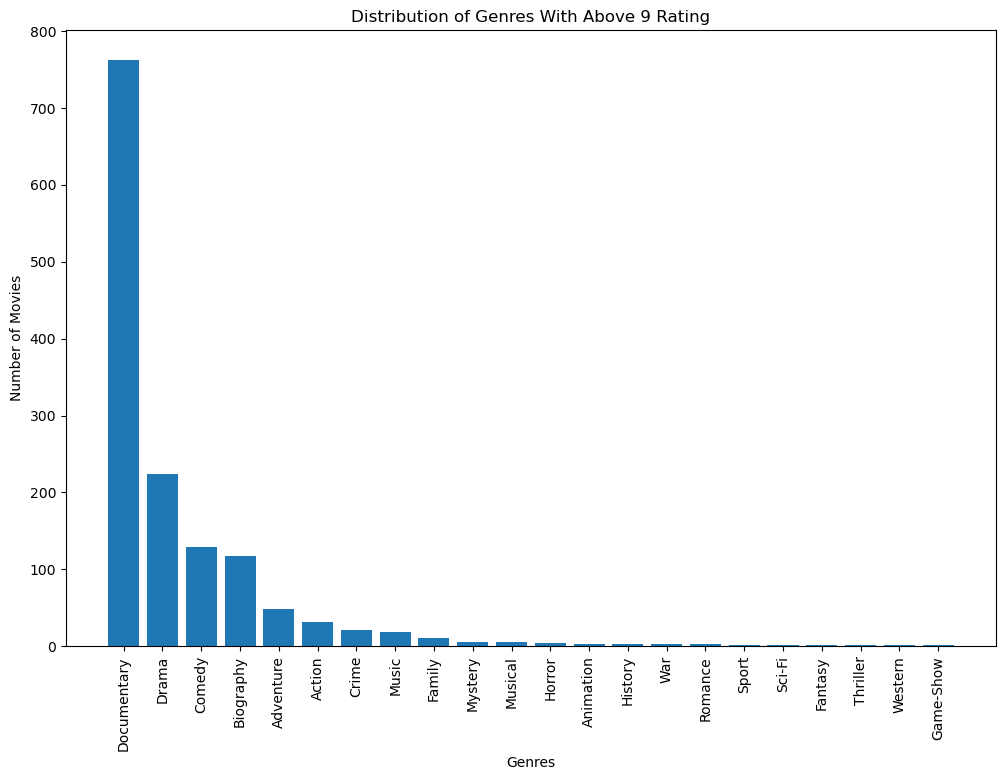

In [36]:
Ratings_genres, ax = plt.subplots(figsize=(12,8))

ax.bar(most_common_genres, most_common_genres_count)

ax.set_xlabel("Genres")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Genres With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

#### ANALYSIS OF THE complete_imdb DATAFRAME

In [39]:
#Filtering the datafram to get films with a rating of 9 and above
complete_imdb_over9 = complete_imdb[complete_imdb['averagerating'] >= 9]
complete_imdb_over9.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
80,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,8,nm0347899,self,Gulzar,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm4827297
81,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,3,nm0080315,self,Mahesh Bhatt,"director,producer,writer","tt0083578,tt0088031,tt0211126,tt0307873",nm4827297
82,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,4,nm0007131,self,Subhash Ghai,"writer,producer,actor","tt0453729,tt0102844,tt0107311,tt0119861",nm4827297
83,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,10,nm0403984,self,Zakir Hussain,"music_department,composer,soundtrack","tt0078788,tt2555736,tt0296621,tt0176016",nm4827297
84,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,7,nm1213521,editor,Jabeen Merchant,"editor,editorial_department,actress","tt3742284,tt0326722,tt0116763,tt0920464",nm4827297


In [41]:
#Filtering the dataframe and group them as directors
complete_imdb_over9_directors = complete_imdb_over9[complete_imdb_over9['category'] == 'director']
complete_imdb_over9_directors.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
87,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,5,nm4827297,director,Brahmanand S. Singh,"director,writer,producer","tt10366116,tt7482222,tt6597248,tt7743400",nm4827297
1636,tt3891594,"Down, But Not Out!","Down, But Not Out!",2015,"Documentary,Sport",9.3,42,5,nm2488331,director,Miguel Gaudêncio,"director,producer,editor","tt7726508,tt7726500,tt5601424,tt9415966",nm2488331
1867,tt5814480,Oltre la fatica,Oltre la fatica,2016,Documentary,9.1,10,5,nm2888925,director,Manuel Fanni Canelles,"actor,director,writer","tt1149274,tt0357356,tt5814480,tt0435441","nm2888925,nm8223048"
1868,tt5814480,Oltre la fatica,Oltre la fatica,2016,Documentary,9.1,10,6,nm8223048,director,Paolo Parisotto,"director,cinematographer,producer","tt7929502,tt5814480","nm2888925,nm8223048"
2646,tt5128292,Dateline: Saigon,Dateline: Saigon,2016,"Biography,Documentary,History",9.4,7,2,nm1265993,director,Thomas D. Herman,"producer,director,writer","tt0319758,tt5128292",nm1265993


In [42]:
#Creating a variable which has data about how many films a director has with a rating of 9 and above
directors_over9 = complete_imdb_over9_directors['primary_name'].value_counts()

In [43]:
#Visualizing the dataset
directors_over9[:20]

Tom Logan            4
Yasmine Asha         4
Nuo Wang             3
Francois Lespes      3
Beto Ribeiro         3
Steve Ravic          3
Fan Li               3
Carla Albuquerque    3
Mladen Maticevic     2
J.J. Harting         2
Neven Hitrec         2
Aghora Vidya         2
Jonathon Link        2
Linda Palmer         2
Corey Lubowich       2
Taylor Morden        2
Navid Navid          2
Patrick Moreau       2
Ari Davidovich       2
Hamid Benamra        2
Name: primary_name, dtype: int64

Plotting a bar chart to visualize the data better 

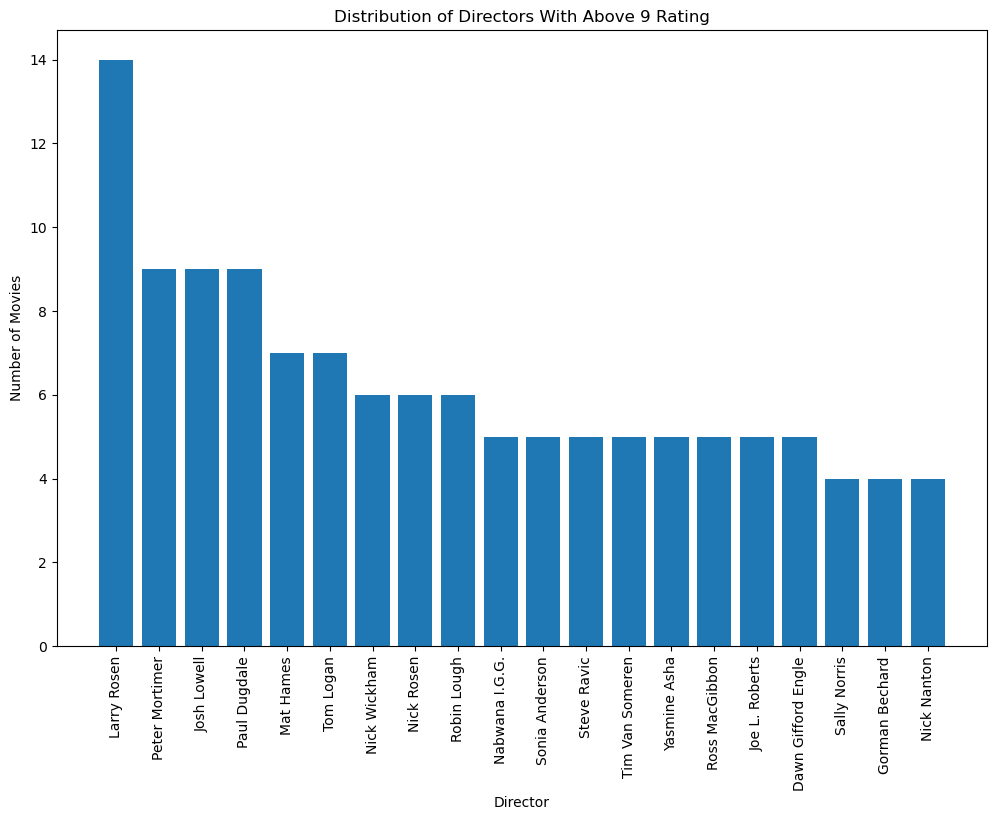

In [59]:
#plotting the data using a barchart to visualize it better 
directors_ave9, ax = plt.subplots(figsize=(12,8))

ax.bar(directors_over9[:20].index.tolist(), directors_over9[:20].values.tolist())

ax.set_xlabel("Director")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Directors With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

In [44]:
#Filtering the dataframe to get actors with films with a rating of 9 and above
complete_imdb_over9_actors = complete_imdb_over9[complete_imdb_over9['category'] == 'actor']
complete_imdb_over9_actors.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
1720,tt4418908,Memoirs of a Broken Mind,Memoirs of a Broken Mind,2015,Drama,9.2,23,2,nm3233253,actor,Danilo Lola Ilic,"editor,director,writer","tt1604091,tt1339076,tt2102402,tt4418908",nm3233253
2643,tt5128292,Dateline: Saigon,Dateline: Saigon,2016,"Biography,Documentary,History",9.4,7,1,nm0001832,actor,Sam Waterston,"actor,producer,director","tt0101124,tt0087553,tt0071577,tt0098844",nm1265993
5022,tt5311546,Natsamrat,Natsamrat,2016,"Drama,Family",9.2,4297,1,nm0007113,actor,Nana Patekar,"actor,music_department,director","tt0110280,tt0102636,tt0451631,tt0476884",nm0542498
5026,tt5311546,Natsamrat,Natsamrat,2016,"Drama,Family",9.2,4297,4,nm0059461,actor,Sunil Barve,"actor,music_department","tt2713666,tt0273884,tt9319890,tt1176187",nm0542498
7257,tt6980696,Curzoner Kalom,Curzoner Kalom,2017,Drama,9.2,99,1,nm3056725,actor,Paran Banerjee,"actor,music_department","tt2351177,tt6376380,tt4579002,tt2133312",nm4988347


In [46]:
#Creating a variable which has data about how many films an actor has with a rating of 9 and above
actors_over9 = complete_imdb_over9_actors['primary_name'].value_counts()


In [47]:
#Visualizing the dataset
actors_over9

Timothy J. Cox          3
Ebi Hamedi              3
Darrin Dewitt Henson    3
Haozheng Li             2
Augusto Farfus          2
                       ..
Nick Lunn               1
Chris Morgan            1
Beulah Cooper           1
Reg Batson              1
Robert Swan             1
Name: primary_name, Length: 1743, dtype: int64

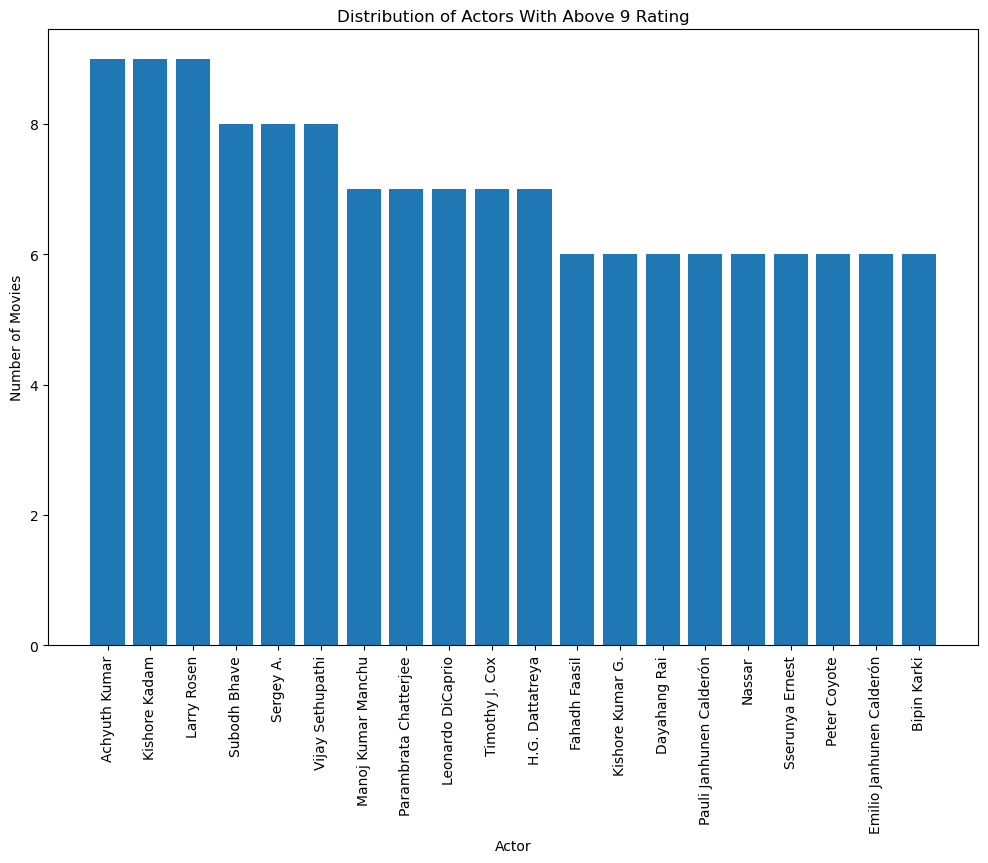

In [64]:
#plotting the data using a barchart to visualize it better
actors_ave9, ax = plt.subplots(figsize=(12,8))

ax.bar(actors_over9[:20].index.tolist(), actors_over9[:20].values.tolist())

ax.set_xlabel("Actor")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Actors With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

Analysis of the movie_budgets to see profits

In [57]:
#Creating a column total_gross for the dataframe movie_budgets
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,760507625,1521015250
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,241063875,482127750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,42762350,85524700
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,459005868,918011736
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,620181382,1240362764


In [50]:
#Changing the dtype to int for better visualization
movie_budgets['worldwide_gross'] = movie_budgets['domestic_gross'].astype('int')

In [54]:
#Stripping the - sign from the column total_gross
movie_budgets['total_gross'] = movie_budgets['total_gross'].astype('str')
movie_budgets['total_gross'] = movie_budgets['total_gross'].str.strip('-')

In [ ]:
#Changing the dtype to int for better visualization
movie_budgets['total_gross'] = movie_budgets['total_gross'].astype('int')

In [55]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,760507625,2147483648
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,241063875,1286727750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,42762350,192524700
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,459005868,1862019831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,620181382,1936903129


In [13]:
#Checking to see if everything is okay
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int32  
 3   domestic_gross     5782 non-null   int32  
 4   worldwide_gross    5782 non-null   float64
 5   total_gross        5782 non-null   float64
dtypes: float64(2), int32(2), object(2)
memory usage: 271.0+ KB


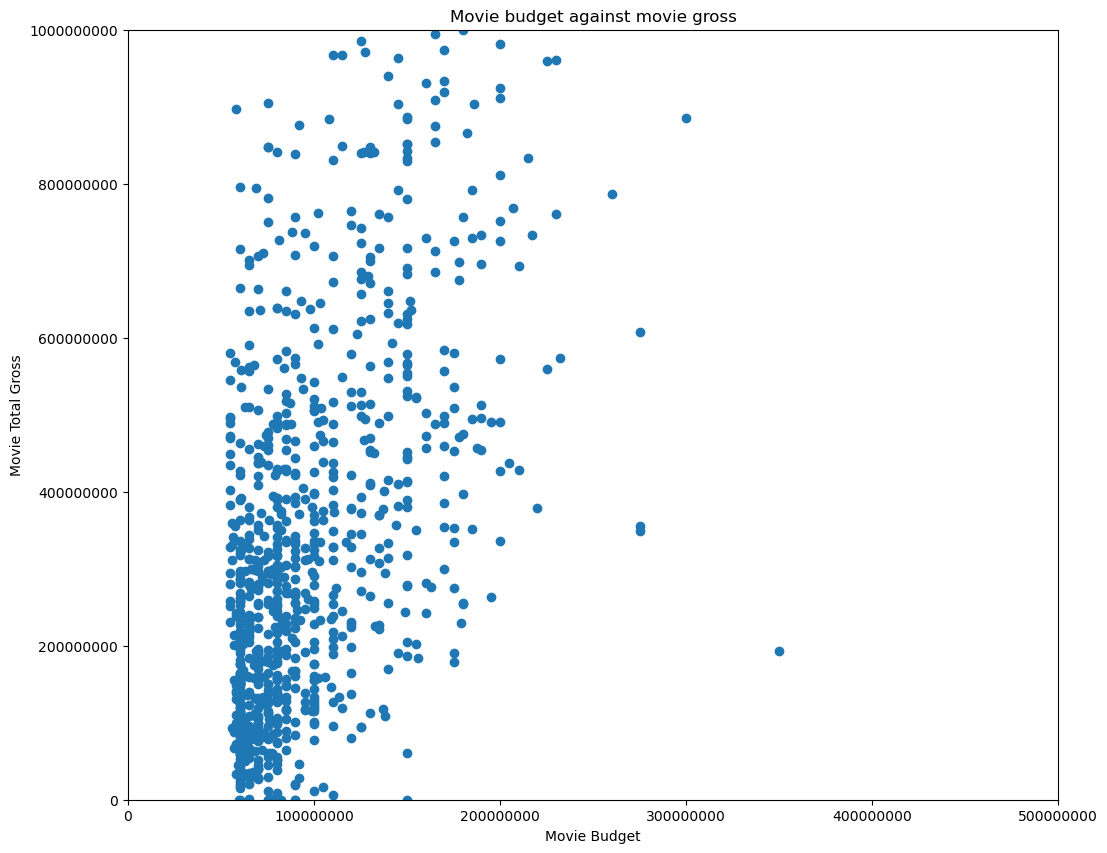

In [19]:
#plotting the data using a barchart to visualize it better
moviebudgets, ax = plt.subplots(figsize=(12,10))

ax.plot(movie_budgets['production_budget'][:1000], movie_budgets['total_gross'][:1000], 'o')

ax.set_xlim([0, 500000000])
ax.set_ylim([0, 1000000000])
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Movie Total Gross")
ax.set_title("Movie budget against movie gross")
ax.set_xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000])
ax.set_yticks([0, 200000000, 400000000, 600000000, 800000000, 1000000000])
ax.ticklabel_format(style='plain', axis='both')


In [59]:
#Checking the corelation between the columns
corr_matrix = movie_budgets.corr()
corr_movies = corr_matrix['production_budget']['total_gross']
print(corr_movies)

0.6856818396752723


C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_2480\1814018652.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie_budgets.corr()


We have a found a positive correlation of 0.69 

## CONCLUSION

## RECOMMENDATION